In [2]:
using Plots
using CSV
using Tables
using DataFrames
using Statistics
using StatsPlots

In [3]:
function linear2cartesian(s)
    return collect(Tuple(CartesianIndices((max_progress, max_power, max_h2o, max_o2, max_food))[s]))

end


linear2cartesian (generic function with 1 method)

In [4]:
infile = "MCTS_policy_sarsp.csv"
df = CSV.read(infile, DataFrame, header = false)
Data = Matrix(df)
initial_state = df[1,1]
indices_restart = findall(x -> x == initial_state, df[:, 1])
steps = []

for i in 2:length(indices_restart)
    if (df[indices_restart[i]-1, 3] != 1000000000000)
        steps = push!(steps, 0)
    else 
        steps = push!(steps, (indices_restart[i] - indices_restart[i-1]))
    end
end


In [5]:
df = CSV.read("random_policy.csv", DataFrame)
random_steps = Matrix(df)

100×1 Matrix{Int64}:
 80
 94
 61
 44
 64
 76
 42
 67
 49
 88
  ⋮
 96
  0
 90
 62
 44
 56
 26
  0
 33

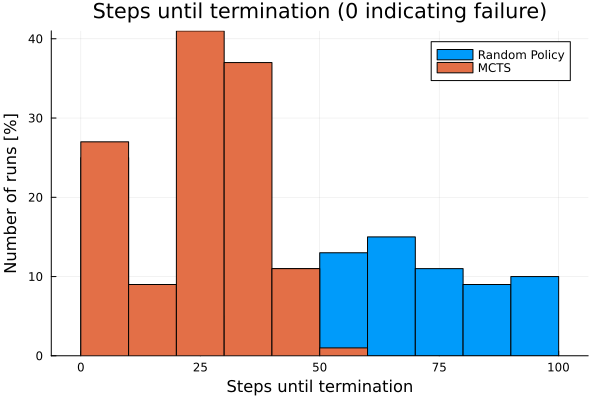

In [14]:
histogram(random_steps; bins = 0:10:100, label= "Random Policy" )
histogram!(steps; bins = 0:10:100, label= "MCTS", title = "Steps until termination (0 indicating failure)" )

ylabel!("Number of runs [%]")
xlabel!("Steps until termination")

In [9]:
#plot Mission Progress and resources over time

# Dimensions
max_progress = 10
max_power = 50
max_h2o = 50
max_o2 = 50
max_food = 50

p1 = plot()
states = []
for i in 2:(length(indices_restart))
    states = Data[indices_restart[i-1]:(indices_restart[i]-1), 1]
    states = push!(states, Data[(indices_restart[i]-1), 4])
    states = stack([linear2cartesian(state) for state in states], dims = 1)
    
    mission = states[:,1]/max_progress
    resources_E = states[:, 2]/max_power
    resources_H2O = states[:,3]/max_h2o
    resources_oxy = states[:,4]/max_o2
    resources_food = states[:,5]/max_food
    resources_total = (resources_E  + resources_H2O + resources_oxy + resources_food)/(max_power + max_h2o + max_o2 + max_food)
    t = range(0, length=length(mission))


    plot!(p1, t, mission, legend=false, title = "Mission Progress")
    #plot!(p1, t, resources_E, legend=false, title = "Power Accumulation over Time")
    #plot!(p1, t, resources_H2O, legend=false, title = "Water Accumulation over Time")
    #plot!(p1, t, resources_oxy, legend=false, title = "Oxygen Accumulation over Time")
    #plot!(p1, t, resources_food, legend=false, title = "Food Accumulation over Time")
        


    vline!(p1, 10)
end

ylabel!("[%]")
xlabel!("Time [steps]")
#ylims!(0.9, (state_dimensions[1] + state_dimensions[2] + 1))
#xlims!(0.9, state_dimensions[3] + 0.5)

savefig(p1, "Mission Progress.pdf")

"/Users/Anna/Documents/SanFran/04_Academics/01_Autumn Quarter 2023/AA228/aa-228-final-project/Mission Progress.pdf"

In [7]:
#plot Mission Progress and resources for one run

# Dimensions
max_progress = 10
max_power = 50
max_h2o = 50
max_o2 = 50
max_food = 50

p2 = plot()
states = []
states = Data[indices_restart[7]:(indices_restart[8]-1), 1]
states = push!(states, Data[(indices_restart[8]-1), 4])
states = stack([linear2cartesian(state) for state in states], dims = 1)

mission = 100 *states[:,1]/max_progress
resources_E = 100* states[:, 2]/max_power
resources_H2O = 100 * states[:,3]/max_h2o
resources_oxy = 100 * states[:,4]/max_o2
resources_food = 100 * states[:,5]/max_food
t = range(0, length=length(mission))

plot!(p2,t,
    [mission resources_E resources_H2O resources_oxy resources_food],
    label=["Mission Progress" "Power" "Water" "Oxygen" "Food"]
)
hline!(p2, [100], linewdith = 2, label="Mission Goal")

ylabel!("[%]")
xlabel!("Time [steps]")
#ylims!(0.9, (state_dimensions[1] + state_dimensions[2] + 1))
#xlims!(0.9, state_dimensions[3] + 0.5)

#savefig(p2, "Mission Progress VS Resources3.pdf")

"/Users/Anna/Documents/SanFran/04_Academics/01_Autumn Quarter 2023/AA228/aa-228-final-project/Mission Progress VS Resources3.pdf"

In [13]:
p5 = boxplot([steps[steps .!= 0],random_steps[random_steps .!= 0]],xticks = false, label=["MCTS" "Random Policy"], ylabel="[steps]", title="Steps until successful completion (ignoring failures)")
savefig(p5, "Boxplot.pdf")

"/Users/Anna/Documents/SanFran/04_Academics/01_Autumn Quarter 2023/AA228/aa-228-final-project/Boxplot.pdf"